In [1]:
pip install numpy

In [2]:
pip install astropy

In [3]:
pip install matplotlib

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii, fits

harris_1 = ascii.read("HarrisPartI.csv")
harris_2 = ascii.read("HarrisPartIII.csv")
krause = ascii.read("Krause21.csv")
vdb = ascii.read("vandenBerg_table2.csv")

#Identifies Columns for Files
print("Harris 1 Columns", harris_1.colnames)
print("Harris 2 Columns", harris_2.colnames)
print("Krause Columns", krause.colnames)
print("VandenBerg Columns", vdb.colnames)

Harris 1 Columns ['ID', 'Name', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z']
Harris 2 Columns ['ID', 'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h', 'mu_V', 'rho_0', 'lg_tc', 'lg_th']
Krause Columns ['Class', 'Object', 'AltName', 'Mstar', 'rh', 'C5', 'Age', 'FeH']
VandenBerg Columns ['NGC', 'Name', 'FeH', 'Age', 'Age_err', 'Method', 'Figs', 'Range', 'HBtype', 'R_G', 'M_V', 'v_e0', 'log_sigma_0']


In [20]:
#Convert Column Values into NumPy Arrays

#Age-Metalicity: Krause
k_age = np.array(krause['Age'], dtype=float)
k_met = np.array(krause['FeH'], dtype=float)

#Age-Metalicity: VandenBerg
vb_age = np.array(vdb['Age'], dtype=float)
vb_met = np.array(vdb['FeH'], dtype=float)

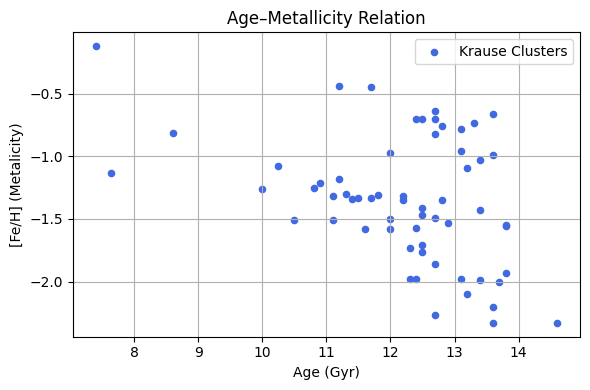

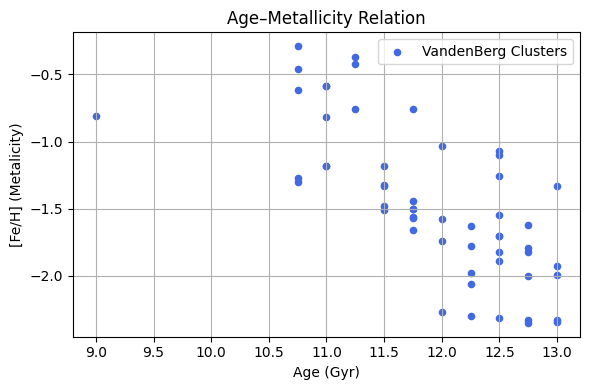

In [26]:
#Visual Graphs of AMR

#Krause:
plt.figure(figsize=(6,4))
plt.scatter(k_age, k_met, s=20, c='royalblue', label='Krause Clusters')
plt.xlabel('Age (Gyr)')
plt.ylabel('[Fe/H] (Metalicity)')
plt.title('Age–Metallicity Relation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#VandenBerg:
plt.figure(figsize=(6,4))
plt.scatter(vb_age, vb_met, s=20, c='royalblue', label='VandenBerg Clusters')
plt.xlabel('Age (Gyr)')
plt.ylabel('[Fe/H] (Metalicity)')
plt.title('Age–Metallicity Relation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# The following Code will be used to fine the outliers over a given threshold of both metalicity and age.

# Outliers in Lower End Metalicty for Krause
mean_krause_met = np.mean(k_met)
std_krause_met = np.std(k_met)

# Threshold can Remain consistent to find values within 2 standard deviations
threshold_1 = 2

krause_lowmet = k_met[(k_met < mean_krause_met - threshold_1*std_krause_met)]

print("Low-End Outliers in Metalicity", krause_lowmet)



Low-End Outliers in Metalicity []


In [34]:
# Repeat to find higher-end for age

mean_krause_age = np.mean(k_age)
std_krause_age = np.std(k_age)

krause_hiage = k_age[(k_age > mean_krause_age - threshold_1*std_krause_age)]

print("High-End Outliers in Age", krause_hiage)

# Visibly there are no intersections between these two sets, implying the threshold may need adjusting.


High-End Outliers in Age [12.8  12.2  10.   10.24 12.   12.4  11.2  11.1  12.7  12.5  12.7  12.3
 11.4  12.5  13.6  12.3  11.5  12.7  12.2  12.5  12.5  13.1  11.6  13.8
 13.4  11.7  13.4  12.4  13.6  13.2  12.7  13.6  13.3  11.7  13.4  11.2
 12.4  10.5  12.9  11.3  12.5  13.1  12.   12.7  12.8  10.8  13.2  13.1
 13.8  13.7  13.8  12.7  11.1  10.9  13.6  11.8  14.6  12.  ]


In [ ]:
# Attempting this process for the VandenBerg Dataset:

mean_vb_met = np.mean(vb_met)
std_vb_met = np.std(vb_met)

vb_lowmet = vb_met[(vb_met < mean_vb_met - threshold_1*std_vb_met)]

print("Low-End Outliers in Metalicity", vb_lowmet)

mean_vb_age = np.mean(vb_age)
std_vb_age = np.std(vb_age)

vb_hiage = vb_age[(vb_age > mean_vb_age - threshold_1*std_vb_age)]

print("High-End Outliers in Age", krause_hiage)